In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [12]:
df_train = pd.read_csv("../ML_Project/train.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
def missing_values(df):
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
# percentage_isnull = 100 * train_df.isnull().sum()/len(train_df)
# mis_val_table = pd.concat([percentage_isnull], axis=1)
# mis_val_table

missing_values(df_train)

Your selected dataframe has 81 columns.
There are 19 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3
LotFrontage,259,17.7
GarageType,81,5.5
GarageYrBlt,81,5.5
GarageFinish,81,5.5
GarageQual,81,5.5


### Cleaning Data

In [15]:
df_train.shape

(1460, 81)

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [17]:
#Function for fillna with 'None'. Same function can be used to fillna with 0 for binary columns
#Assign the lists want to change to a list named (eg.na_cols) and pass it in the function.


na_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu','GarageType', 'GarageFinish',
           'GarageQual', 'GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
          "MasVnrType",'MSSubClass', ] 

def fill_all_with_none(df, col_list):
    """Function that takes a list of column names as strings
    and mutates the dataframe by replacing NA values with the
    string "None"
    
    Arguments:
    ==========
    df: the dataframe to replace NAs
    col_list: list of column names as strings
    
    Return:
    ==========
    None (mutates dataframe)
    """
    
    # replace NA with "None"
    for col in col_list:
        df[col].fillna('None', inplace = True)

fill_all_with_none(df_train, na_cols)

### First EDA Plots

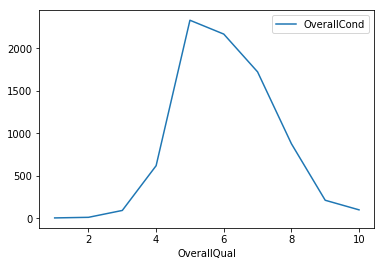

In [18]:
overall = df_train.groupby('OverallQual')['OverallCond'].agg({'OverallCond': 'sum'}).plot()
overall


Text(0, 0.5, 'No. of Houses Built')

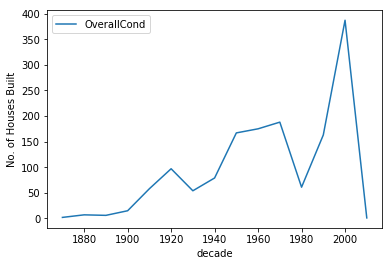

In [19]:
df_train['decade'] = 10 * (df_train['YearBuilt']// 10)
df_train.pivot_table('OverallCond', index = 'decade', aggfunc = 'count').plot()
plt.ylabel('No. of Houses Built')


In [20]:
#trying to find a corelation between saleprice, yearbuilt and overalcondition

df_train.groupby('decade')[['SalePrice', 'OverallCond']].agg({'SalePrice': 'median'})

#Although overall condition were built between 1880-1970, houses built after 2010 have the highest market price


SalePrice            
       SalePrice OverallCond
decade                      
1870    108000.0         6.5
1880    124000.0         7.0
1890    142200.0         7.0
1900    127000.0         7.0
1910    128750.0         6.0
1920    115000.0         6.0
1930    126500.0         6.0
1940    122900.0         6.0
1950    136000.0         6.0
1960    146000.0         5.0
1970    147500.0         6.0
1980    178000.0         5.0
1990    204000.0         5.0
2000    223500.0         5.0
2010    394432.0         2.0

In [21]:
# We only have one one house for this group (small sample size), so our mean is not necessarily
# indicative of the mean of the houses built in 2010
df_train[df_train.decade == 2010].OverallCond

378    2
Name: OverallCond, dtype: int64

### Transforming the SalePrice Column

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <a list of 10 Patch objects>)

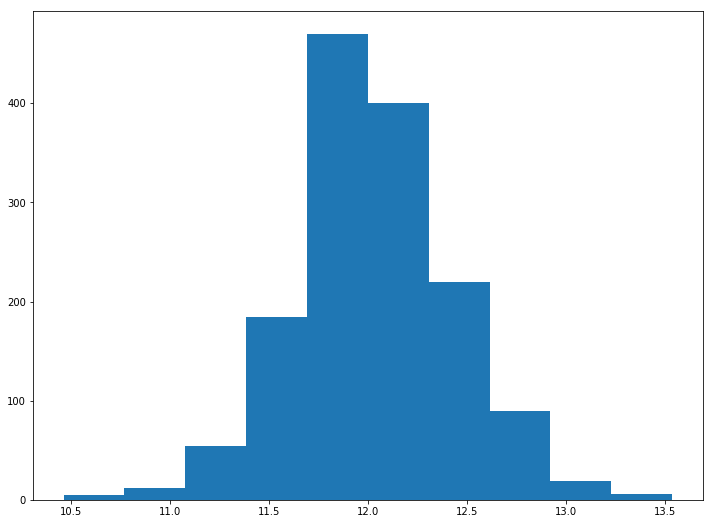

In [22]:
plt.figure(figsize=(12,9))
plt.hist(np.log(df_train.SalePrice))

In [23]:
#When training model use log_SalePrice as y(target) and remove SalePrice from X(otherwise data leakage)
df_train['log_SalePrice'] = np.log(df_train['SalePrice'])
#df_train.drop('SalePrice', inplace = True, axis = 1)

### Outliers

In [24]:
numeric_feats = df_train.dtypes[df_train.dtypes != 'object'].index
numeric_feats = numeric_feats[~numeric_feats.isin(['SalePrice', 'log_SalePrice', 'Id'])]
numeric_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'decade'],
      dtype='object')

In [25]:
outlier_feats = {}

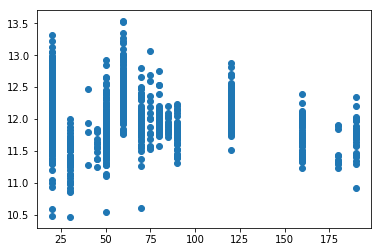

Does MSSubClass feature have outliers?no


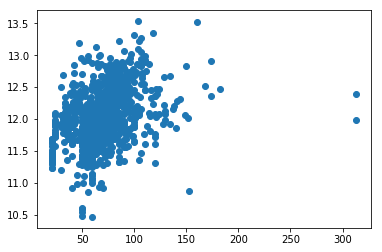

Does LotFrontage feature have outliers?yes


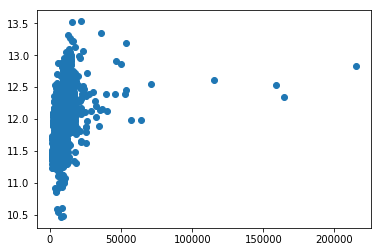

Does LotArea feature have outliers?yes


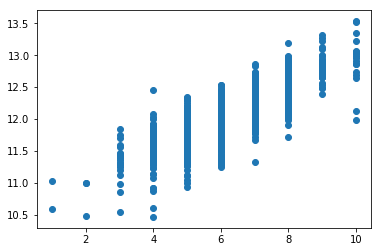

Does OverallQual feature have outliers?no


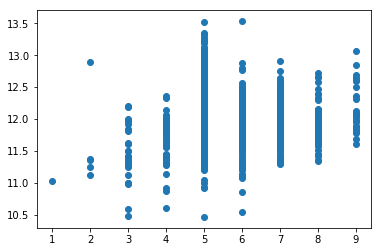

Does OverallCond feature have outliers?no


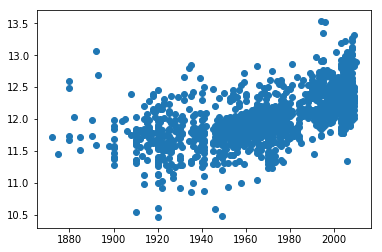

In [ ]:
# Let's plot these features against log_SalePrice
%matplotlib inline

for feat in numeric_feats:
    plt.figure()
    plt.scatter(df_train[feat], df_train['log_SalePrice'])
    plt.show()
    outlier_feats[feat] = input('Does {} feature have outliers?'.format(feat))

In [91]:
outliers_list = []

for key in outlier_feats:
    if outlier_feats[key] in ['yes', 'Yes']:
        outliers_list.append(key)

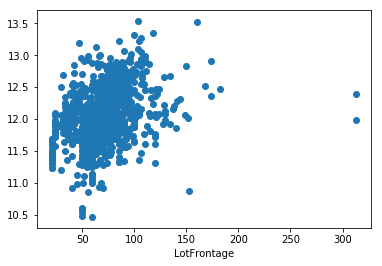

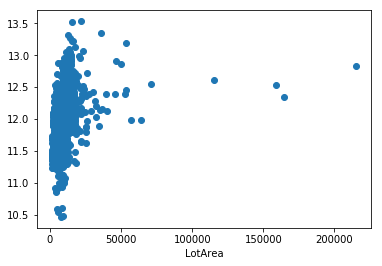

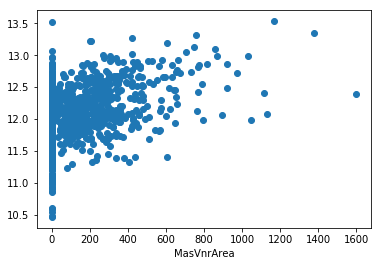

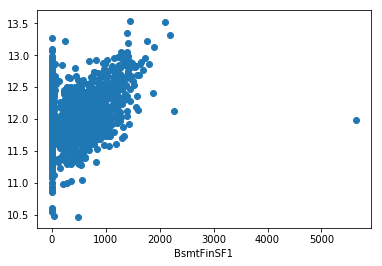

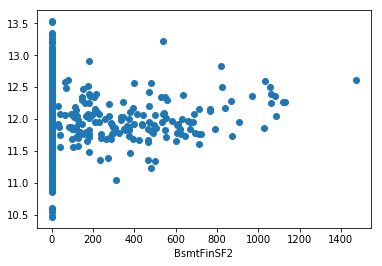

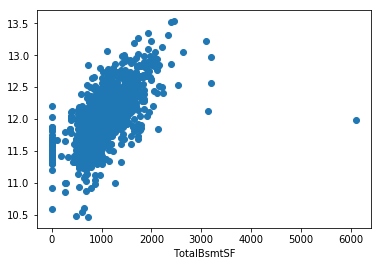

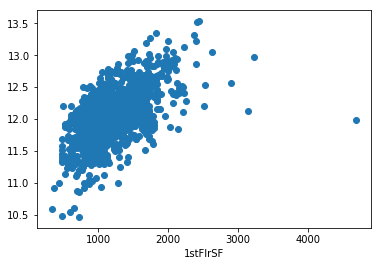

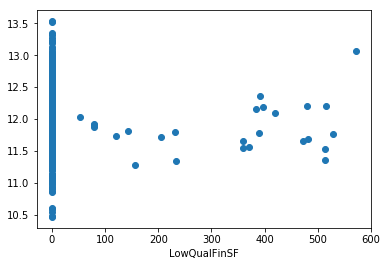

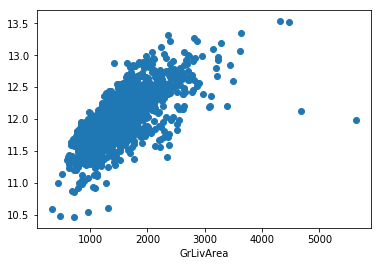

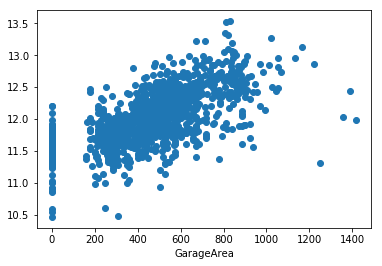

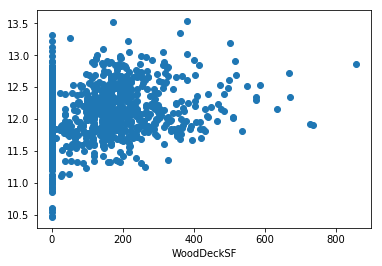

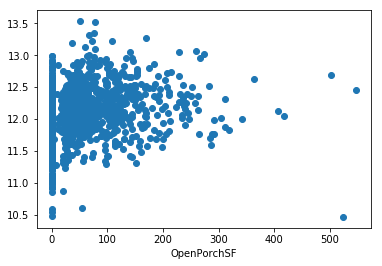

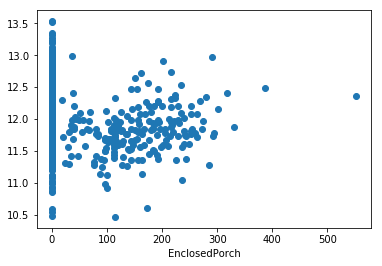

In [122]:
for feat in outliers_list:
    plt.figure()
    plt.scatter(df_train[feat], df_train['log_SalePrice'])
    plt.xlabel(feat)
    plt.show()

In [123]:
# Do this for columns with continuous data
# We found our outlier columns, they are in outliers_list
#Function to identify the outliners (numbers can be 2-3-4)

outlier_df = df_train[outliers_list]
df_nooutliers = df_train.loc[outlier_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 4).all(axis=1)]
df_nooutliers


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,decade,log_SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,2000,12.247694
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,1970,12.109011
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,2000,12.317167
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,2000,12.429216
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,None,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000,1990,11.870600
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,None,None,None,0,8,2007,WD,Normal,307000,2000,12.634603
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,None,None,None,0,4,2008,WD,Abnorml,129900,1930,11.774520
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,None,None,None,0,1,2008,WD,Normal,118000,1930,11.678440
10,11,20,RL,70.0,11200,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1965,1965,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,906,Unf,0,134,1040,GasA,Ex,Y,SBrkr,1040,0,0,1040,1,0,1,0,3,1,TA,5,Typ,0,None,Detchd,1965.0,Unf,1,384,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,2,2008,WD,Normal,129500,1960,11.771436
11,12,60,RL

In [104]:
outlier_df

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch
0,65.0,8450,196.0,706,0,856,856,0,1710,548,0,61,0
1,80.0,9600,0.0,978,0,1262,1262,0,1262,460,298,0,0
2,68.0,11250,162.0,486,0,920,920,0,1786,608,0,42,0
3,60.0,9550,0.0,216,0,756,961,0,1717,642,0,35,272
4,84.0,14260,350.0,655,0,1145,1145,0,2198,836,192,84,0
5,85.0,14115,0.0,732,0,796,796,0,1362,480,40,30,0
6,75.0,10084,186.0,1369,0,1686,1694,0,1694,636,255,57,0
7,NaN,10382,240.0,859,32,1107,1107,0,2090,484,235,204,228
8,51.0,6120,0.0,0,0,952,1022,0,1774,468,90,0,205
9,50.0,7420,0.0,851,0,991,1077,0,1077,205,0,4,0


### Ordinal categorical features  numerical-type

In [124]:
df_nooutliers['ExterQual'] = df_nooutliers['ExterQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_nooutliers['ExterCond'] = df_nooutliers['ExterCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_nooutliers['BsmtQual'] = df_nooutliers['BsmtQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_nooutliers['BsmtCond'] = df_nooutliers['BsmtCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_nooutliers['BsmtExposure'] = df_nooutliers['BsmtExposure'].map({'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'None':0})
df_nooutliers['BsmtFinType1'] = df_nooutliers['BsmtFinType1'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'None':0})
df_nooutliers['BsmtFinType2'] = df_nooutliers['BsmtFinType2'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'None':0})
df_nooutliers['HeatingQC'] = df_nooutliers['HeatingQC'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_nooutliers['KitchenQual'] = df_nooutliers['KitchenQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_nooutliers['FireplaceQu'] = df_nooutliers['FireplaceQu'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_nooutliers['GarageQual'] = df_nooutliers['GarageQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_nooutliers['GarageCond'] = df_nooutliers['GarageCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_nooutliers['PoolQC'] = df_nooutliers['PoolQC'].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'None':0})
df_nooutliers['Fence'] = df_nooutliers['Fence'].map({'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'None':0})


In [125]:
df_nooutliers

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,decade,log_SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,6,706,1,0,150,856,GasA,5,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,0,Attchd,2003.0,RFn,2,548,3,3,Y,0,61,0,0,0,0,0,0,None,0,2,2008,WD,Normal,208500,2000,12.247694
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,5,978,1,0,284,1262,GasA,5,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,3,Attchd,1976.0,RFn,2,460,3,3,Y,298,0,0,0,0,0,0,0,None,0,5,2007,WD,Normal,181500,1970,12.109011
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,6,486,1,0,434,920,GasA,5,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,3,Attchd,2001.0,RFn,2,608,3,3,Y,0,42,0,0,0,0,0,0,None,0,9,2008,WD,Normal,223500,2000,12.317167
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3,6,655,1,0,490,1145,GasA,5,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,3,Attchd,2000.0,RFn,3,836,3,3,Y,192,84,0,0,0,0,0,0,None,0,12,2008,WD,Normal,250000,2000,12.429216
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,Wood,4,3,1,6,732,1,0,64,796,GasA,5,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,3,5,Typ,0,0,Attchd,1993.0,Unf,2,480,3,3,Y,40,30,0,320,0,0,0,3,Shed,700,10,2009,WD,Normal,143000,1990,11.870600
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,4,3,PConc,5,3,3,6,1369,1,0,317,1686,GasA,5,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,4,7,Typ,1,4,Attchd,2004.0,RFn,2,636,3,3,Y,255,57,0,0,0,0,0,0,None,0,8,2007,WD,Normal,307000,2000,12.634603
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,3,3,BrkTil,3,3,1,1,0,1,0,952,952,GasA,4,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,3,8,Min1,2,3,Detchd,1931.0,Unf,2,468,2,3,Y,90,0,205,0,0,0,0,0,None,0,4,2008,WD,Abnorml,129900,1930,11.774520
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,BrkTil,3,3,1,6,851,1,0,140,991,GasA,5,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,3,5,Typ,2,3,Attchd,1939.0,RFn,1,205,4,3,Y,0,4,0,0,0,0,0,0,None,0,1,2008,WD,Normal,118000,1930,11.678440
10,11,20,RL,70.0,11200,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1965,1965,Hip,CompShg,HdBoard,HdBoard,None,0.0,3,3,CBlock,3,3,1,3,906,1,0,134,1040,GasA,5,Y,SBrkr,1040,0,0,1040,1,0,1,0,3,1,3,5,Typ,0,0,Detchd,1965.0,Unf,1,384,3,3,Y,0,0,0,0,0,0,0,0,None,0,2,2008,WD,Normal,129500,1960,11.771436
11,12,60,RL,85.0,11924,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,WdShing,Wd Shng,Stone,286.0,5,3,PConc,5,3,1,6,998,1,0,177,1175,GasA,5,Y,SBrkr,1182,

In [126]:
df_nooutliers['MoSold'] = df_nooutliers['MoSold'].astype('str')

In [128]:
df_nooutliers['LotShape'].value_counts()

Reg    804
IR1    290
IR2     19
IR3      3
Name: LotShape, dtype: int64

### Correlation

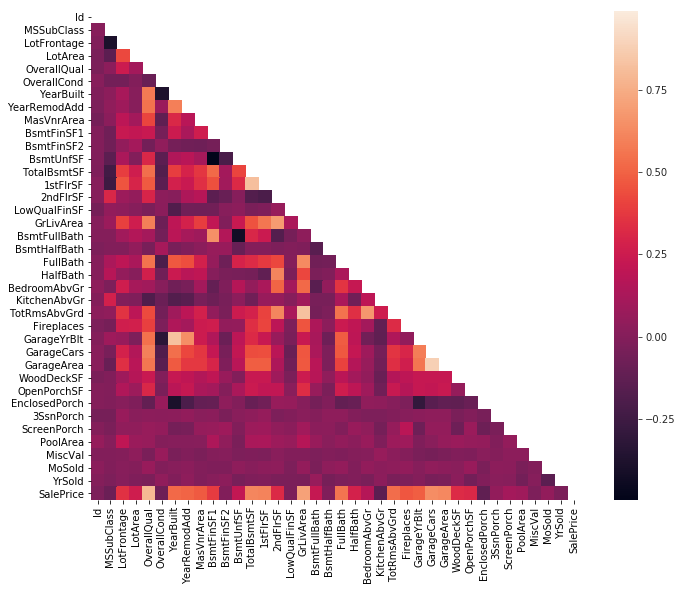

In [14]:
df_train[df_train.columns[1:]].corr()['SalePrice'][:]


df_train[df_train.columns[1:]].corr()['SalePrice'][:]

corrmap = df_train.corr()
plt.subplots(figsize=(12,9))

mask = np.zeros_like(corrmap)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(corrmap, mask=mask, vmax=0.99, square=True)


### Filling NAs

In [174]:
print(df_nooutliers.Electrical.mode())
df_nooutliers['Electrical'] = df_nooutliers.Electrical.fillna(df_nooutliers.Electrical.mode()[0])
df_nooutliers['GarageYrBlt'] = df_nooutliers.GarageYrBlt.fillna(0)

0    SBrkr
dtype: object


### Dummifying

In [176]:
df_nooutliers.set_index('Id', inplace=True)
final_df = pd.get_dummies(df_nooutliers, drop_first=True)

## Modeling (Linear Regression)

In [ ]:
from sklearn import linear_model, model_selection
ols = linear_model.LinearRegression()

In [178]:
X = final_df.drop(columns=['SalePrice', 'log_SalePrice'], axis = 1)
y = final_df['log_SalePrice']

In [179]:
pd.set_option('display.max_rows', 300)

In [180]:
np.sum(X.isnull(), axis = 0)

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
ExterQual                0
ExterCond                0
BsmtQual                 0
BsmtCond                 0
BsmtExposure             0
BsmtFinType1             0
BsmtFinSF1               0
BsmtFinType2             0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
HeatingQC                0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
KitchenQual              0
TotRmsAbvGrd             0
Fireplaces               0
FireplaceQu              0
GarageYrBlt              0
GarageCars               0
GarageArea               0
G

In [182]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = .3, random_state = 42)

In [183]:
ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [184]:
ols.predict(X_test)

array([11.71367728, 11.97371389, 12.14110352, 12.28667842, 12.564936  ,
       12.56667403, 11.90363368, 12.2417716 , 12.77200445, 12.10899127,
       12.26174463, 12.77787236, 11.86285922, 12.69824514, 11.83162722,
       11.88982178, 11.84486487, 12.18473094, 12.15274525, 11.48165466,
       11.72514297, 11.59354413, 11.74731649, 11.80587404, 12.19621341,
       11.47960633, 12.49600904, 12.12252785, 11.55324182, 12.32834478,
       12.51038842, 11.91499798, 12.12906319, 11.63855377, 11.68159986,
       12.25857775, 10.9092303 , 11.64870348, 12.08744471, 12.20013808,
       12.50001312, 12.12613568, 12.40980607, 11.81202783, 12.0850537 ,
       12.219482  , 12.0078966 , 12.30005057, 12.03203761, 12.27546426,
       11.64880563, 11.66265448, 11.88581591, 11.41845853, 12.27053792,
       11.67813635, 11.78023449, 11.48605632, 11.71361544, 13.07626523,
       12.01803936, 12.59814808, 11.95293017, 12.77002538, 12.2007215 ,
       11.86434454, 11.67421359, 11.43311244, 12.25755894, 12.54

In [185]:
ols.score(X_test, y_test)

0.8394146436672578

## Modeling